# ELM463
## LAB00
### Written by Alperen Arslan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, int32

### Task 1 - PGM Write

In [2]:
# Description:
#
# Write given matrix to PGM file
#
# @param[1]: Image matrix. It must be consist of pixel values.
# @param[2]: Filename. It is name of PGM file that wants to be create.
# @param[3]: Width. Width value of the image.
# @param[4]: Height. Height value of the image.
# @param[5]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @param[6]: Resolution. The value of maximum pixel value. Default define is 255.
#
# @return: No return
def pgmwrite(img, filename, width, height, magicNum='P5', resolution=255):
    # Transform given image array to numpy array
    img = np.array(img, dtype=np.uint8)
    
    # Create pgm file
    with open(filename, 'wb') as f:
        # Write header to pgm file
        f.write(bytes(f"{magicNum}\n{width} {height}\n{resolution}\n", 'utf-8'))
        
        # Write data to pgm file
        f.write(img.tobytes())

In [3]:
im = [[101, 102, 103], [104, 105, 106], [107, 108, 109]]
pgmwrite(im,'img/test.pgm',3,3)

### Task 2 - PGM Read

In [4]:
# Description:
#
# Read given matrix to PGM file
#
# @param[1]: Filename. It is name of PGM file that wants to read.
#
# @return[1]: Image Data. The values of image pixels.
# @return[2]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @return[3]: Width. Width value of the image.
# @return[4]: Height. Height value of the image.
# @return[5]: Resolution. The value of maximum pixel value.
#
def pgmread(filename):
    with open(filename, 'rb') as f:
        # Read the header section
        header_lines = []
        for line in f:
            line = line.rstrip().decode('utf-8')
            if line and not line.startswith('#'):
                header_lines.append(line)
                if len(header_lines) == 3:
                    break

        # Parse the header information
        magicNum = header_lines[0]
        width, height = map(int, header_lines[1].split())
        resolution = int(header_lines[2])

        # Read the remaining data
        imageData = f.read()

    return (imageData, magicNum, width, height, resolution)

Magic Num: P5
Width: 3
Height: 3
Resolution: 255

Image Matrix: 

[[101 102 103]
 [104 105 106]
 [107 108 109]]



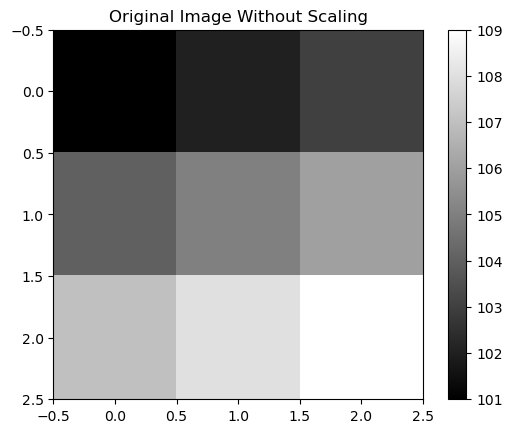

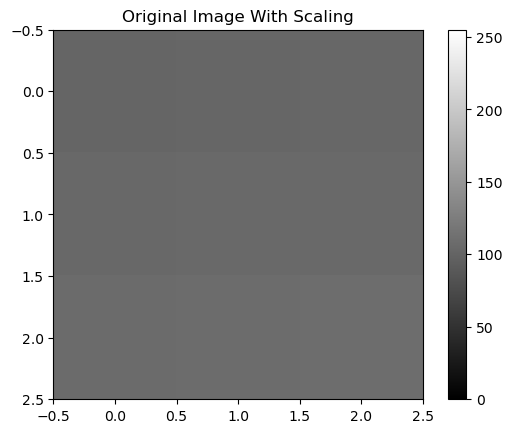

In [5]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/test.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image Without Scaling')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Original Image With Scaling')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

### Task 3

Magic Num: P5
Width: 512
Height: 512
Resolution: 255

Image Matrix: 

[[162 162 162 ... 169 154 124]
 [162 162 162 ... 169 154 124]
 [162 162 162 ... 169 154 124]
 ...
 [ 27  27  35 ...  97  92  91]
 [ 28  28  40 ...  97  98 102]
 [ 28  28  40 ...  97  98 102]]



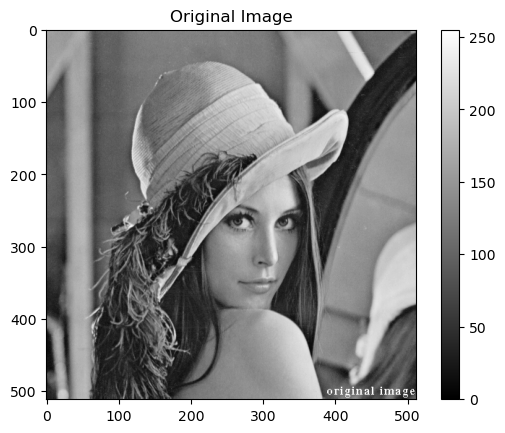

In [6]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/lena.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

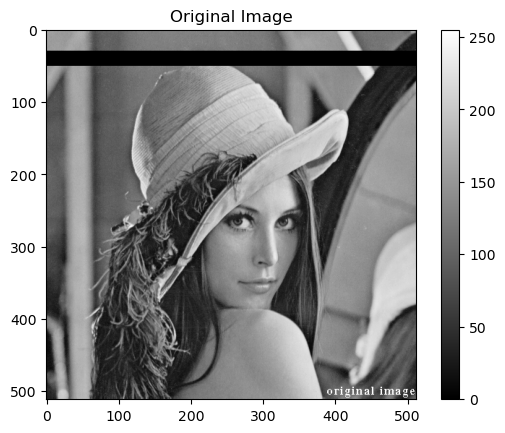

In [7]:
newImage = np.copy(image)  # New image buffer

# Apply the condition using array slicing
newImage[30:51, :] = 0

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(newImage, cmap="gray")
plt.colorbar()

# Saving Image
pgmwrite(newImage, 'img/myLena.pgm', width, height)
